# Predicting Heart Disease using Machine Learning

![machine learning framework](./images/framework.png)

In [1]:
# Preparing main Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load Data

In [2]:
df = pd.read_csv('./data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# is there null data?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- There is not null data. GREAT!!

In [4]:
# What are the datatypes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

- All the features are numbers

In [5]:
# Need more data about the dataframe
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# What about the target (true results)?
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

- So in this datasets there are more patients suffering heart disease

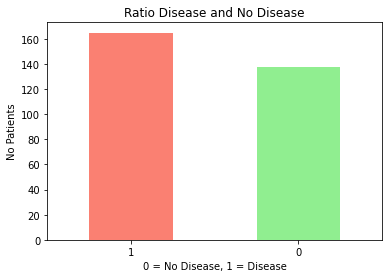

In [7]:
df['target'].value_counts().plot(kind = 'bar', color=['salmon', 'lightgreen']);
plt.title('Ratio Disease and No Disease')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('No Patients')
plt.xticks(rotation=0);
plt.savefig('./images/ratio_disease_and_no_Disease.png')

In [8]:
# Use this information to compare sex
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


We can infer some stuffs from these table
- Women that got the test are almost 70% poisitve, curious
- Men that got the test are about 55% negative.

These inferences are based just on the sex of the patient

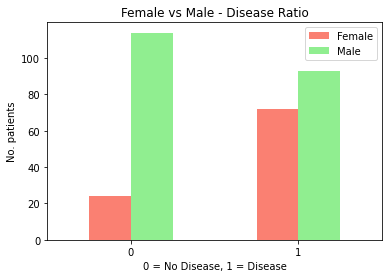

In [9]:
# Lets make a plot to share the result
pd.crosstab(df['target'], df['sex']).plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title('Female vs Male - Disease Ratio')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('No. patients')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
plt.savefig('./images/female_male_disease_ratio.png');

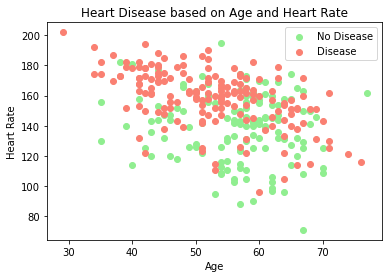

In [10]:
# Heart Rate vs Age
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0],
            c='lightgreen')
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c='salmon')
plt.title('Heart Disease based on Age and Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['No Disease','Disease'])
plt.savefig('./images/heart_disease_based_on_age_and_heart_rate.png');

We can infer:
- Younger people has higher heart rate, what its obviosuly, so more depend on the age, as we can see in the plot, heart disease its related to older patients.

<AxesSubplot:ylabel='Frequency'>

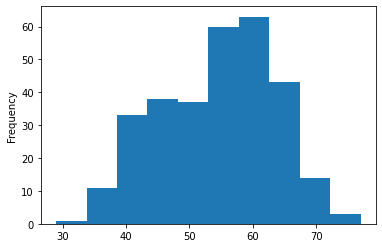

In [11]:
# Lets check the distribution of the ages
df.age.plot.hist()

There more patients between 55 and 65 years old

In [12]:
# Now try with chest pain(cp)
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


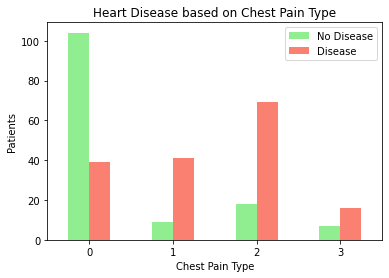

In [13]:
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                   color = ['lightgreen', 'salmon'])
plt.title('Heart Disease based on Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Patients')
plt.xticks(rotation =0)
plt.legend(['No Disease','Disease'])
plt.savefig('./images/heart_disease_based_on_chest_pain.png')

cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

It looks like chest pain is not related to heart disease

In [14]:
# Because seems like some features are not related to the target lets use correlation to verify
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


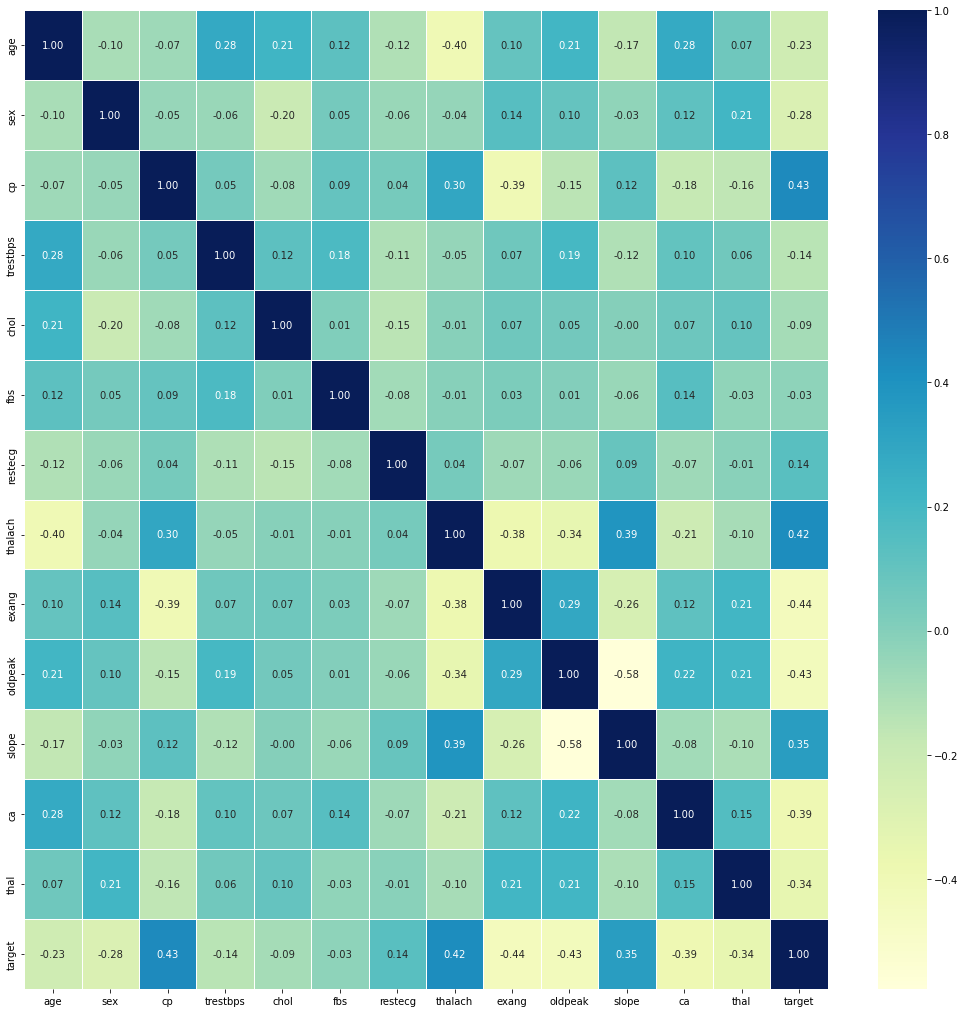

In [15]:
# Create a plot showing the correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(18,18))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap="YlGnBu")
plt.savefig('./images/features_correlations.png');

- This plot differ from the previous plot, showing that the chest pain is higly correlated with heart disease.
- And slope and oldpeak have indirect correlation with heart disease.
- Lets create and train a model to help us understand the situation here.

# Modeling

In [17]:
# Split the data in dependent and independents variables
X = df.drop('target', axis=1)
y = df['target']

In [18]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Before continue lest decide which estimator are we going to choose using Sklearn Map.
![Skicit-learn Map](./images/sklearn_map.png)

Models we are going to try:
- Linear SVC
- KNeighbors Classifier
- Random Forest Classifier
- Logistic Regression

In [19]:
# Import the models
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
# Create a dictionary with the models
models = {'Linear SVC': LinearSVC(),
          'KNN': KNeighborsClassifier(),
          'Random Forest Classifier': RandomForestClassifier(),
          'Logistic Regression': LogisticRegression(),}

In [21]:
# Create a function to fit and score the model we've chossen
def fit_and_score_models(models, X_train, X_test, y_train, y_test):
  models_score = {}
  np.random.seed(420)
  for name, model in models.items():
    model.fit(X_train, y_train)
    models_score[name] = model.score(X_test, y_test)
  return models_score

In [24]:
models_score = fit_and_score_models(models, X_train, X_test, y_train, y_test)
models_score

/home/crist-pc/Projects/heart_disease_ml/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crist-pc/Projects/heart_disease_ml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear SVC': 0.7868852459016393,
 'KNN': 0.7377049180327869,
 'Random Forest Classifier': 0.8852459016393442,
 'Logistic Regression': 0.8524590163934426}

In [27]:
models_compare = pd.DataFrame(models_score, index = ['accuracy'])
models_compare.T

,accuracy
Linear SVC,0.786885
KNN,0.737705
Random Forest Classifier,0.885246
Logistic Regression,0.852459


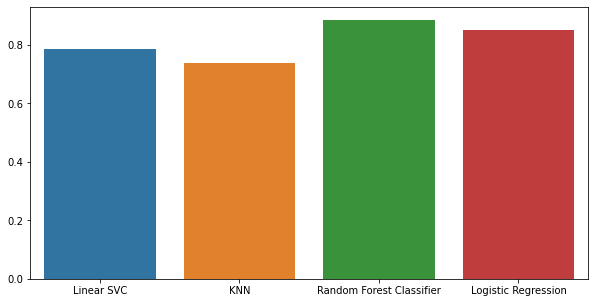

In [32]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(data=models_compare)
fig.savefig('./images/models_no_tunning_compare.png')

KNeighbors Classifier is the worse, Let's tune it

In [40]:
# Create two lists of train and test scores
train_scores = []
test_scores = []

# Create a list of values of the params that will be tunning
neighbors = range(1,21)

# Set the estimator
knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors = i)
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(X_test, y_test))


In [54]:
train_scores, test_scores

([1.0,
  0.7975206611570248,
  0.7479338842975206,
  0.756198347107438,
  0.7727272727272727,
  0.756198347107438,
  0.7355371900826446,
  0.71900826446281,
  0.71900826446281,
  0.7148760330578512,
  0.731404958677686,
  0.6818181818181818,
  0.7024793388429752,
  0.6942148760330579,
  0.6859504132231405,
  0.6859504132231405,
  0.6818181818181818,
  0.6900826446280992,
  0.6859504132231405,
  0.6983471074380165],
 [0.5737704918032787,
  0.6229508196721312,
  0.6885245901639344,
  0.639344262295082,
  0.7377049180327869,
  0.6885245901639344,
  0.7540983606557377,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.7049180327868853,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.7213114754098361,
  0.6721311475409836,
  0.6721311475409836,
  0.6721311475409836,
  0.6557377049180327,
  0.6721311475409836])

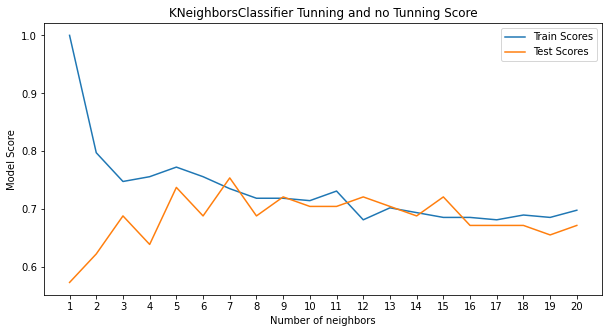

In [52]:
# Create a plot for a better visualization
fig, ax = plt.subplots(figsize=(10,5))
ax = plt.plot(neighbors, train_scores)
ax = plt.plot(neighbors, test_scores)
plt.title('KNeighborsClassifier Tunning and no Tunning Score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend(['Train Scores','Test Scores'])
plt.xticks(range(1,21))
plt.savefig('./images/kneighbors_classifier_tunning_and_tunning_scores.png');


In [53]:
print(f'Best Score of Kneighbors Classifier with Tunning parameters is: {max(test_scores)*100:-.2f}')

Best Score of Kneighbors Classifier with Tunning parameters is: 75.41


With Tunning parameters, Kneighbors Classifier only improve 2% and still be the worse of the estimators

Tuning with RandomizedSearchCV

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [70]:
# Logistic Regression hyperparameter to tune
log_reg_grid =  {'C': [50, 10, 1.0, 0.1, 0.01],
                 'solver': ['liblinear']}

# RandomForestClassifier hyperparameter to tune
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

# LinearSVC hyperparameter to tune
linear_svc_grid = {'C': [0.1, 1, 10, 100, 1000],
                   'tol': [1e-5, 1e-4, 1e-3, 1e-2]}

In [62]:
# Tune Logistis Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose = True,
                                refit = True)
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/home/crist-pc/Projects/heart_disease_ml/env/lib/python3.10/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [50, 10, 1.0, 0.1, 0.01],
                                        'solver': ['liblinear']},
                   verbose=True)

In [63]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1}

In [64]:
rs_log_reg.score(X_test, y_test)

0.8688524590163934

Logistic Regression improved from 85% to 86%, not too much but its better

In [67]:
# Tune RandomForestClassifier
rs_rf = RandomizedSearchCV( RandomForestClassifier(),
                            rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose = True,
                            refit = True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [68]:
rs_rf.score(X_test,y_test)

0.8852459016393442

Its almost the same as the base training. Not enough here

In [72]:
# Tune LinearSVC
rs_linear_svc = RandomizedSearchCV(LinearSVC(),
                                linear_svc_grid,
                                cv=5,
                                n_iter=20,
                                verbose = True,
                                refit = True)
rs_linear_svc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/crist-pc/Projects/heart_disease_ml/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crist-pc/Projects/heart_disease_ml/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crist-pc/Projects/heart_disease_ml/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crist-pc/Projects/heart_disease_ml/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/crist-pc/Projects/heart_disease_ml/env/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  

RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'tol': [1e-05, 0.0001, 0.001, 0.01]},
                   verbose=True)

In [73]:
rs_linear_svc.score(X_test,y_test)

0.7540983606557377

LinearSVC give us worse results using RandozimedSearchGrid

### GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [79]:
gs_log_reg.score(X_test, y_test)

0.8688524590163934

In [80]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

Lets use this Logistic Regression with this parameters because it is the best for now

# Evaluation

We are going to use Logistic Regression with the parameters obtained from GridSearchCV, because give us the highest accuracy (86%).
Now Let's evaluate this estimator. 

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### ROC Curve and AUC

/home/crist-pc/Projects/heart_disease_ml/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


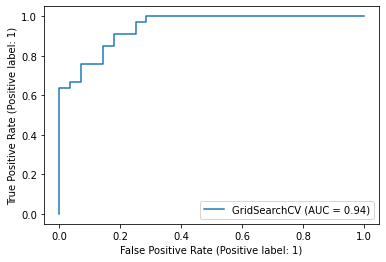

In [83]:
plot_roc_curve(gs_log_reg, X_test, y_test);

### Confuison Matrix

In [84]:
y_preds = gs_log_reg.predict(X_test)

In [85]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[21  7]
 [ 1 32]]


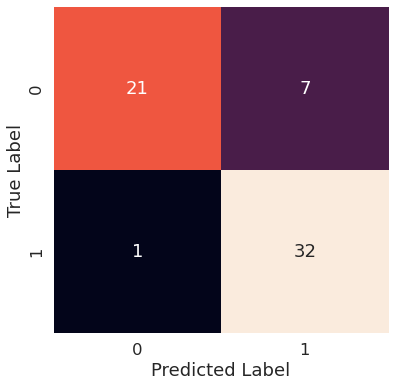

In [89]:
def plot_conf_mat(y_test, y_preds):
  sns.set(font_scale=1.5)
  fig, ax = plt.subplots(figsize=(6, 6))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True, # Annotate the boxes
                    cbar=False)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
    
plot_conf_mat(y_test, y_preds)

Looks like the model its almost perfect but not yet

### Classification Report

In [90]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        28
           1       0.82      0.97      0.89        33

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



- Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- Support - The number of samples each metric was calculated on.
- Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
- Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

In [92]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

Lets evaluate the model with the best estimator with the best parameters

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
clf = LogisticRegression(C=0.08858667904100823,
                         solver='liblinear')

In [96]:
# Accuracy Score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
print(cv_acc)
print(f'Mean: {np.mean(cv_acc)}')

[0.81967213 0.90163934 0.83606557 0.86666667 0.75      ]
Mean: 0.834808743169399


In [98]:
# Precission Score
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
print(cv_precision)
print(f'Mean: {np.mean(cv_precision)}')

[0.775      0.88571429 0.84848485 0.85714286 0.725     ]
Mean: 0.8182683982683983


In [99]:
# Recall Score
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
print(cv_recall)
print(f'Mean: {np.mean(cv_recall)}')

[0.93939394 0.93939394 0.84848485 0.90909091 0.87878788]
Mean: 0.9030303030303031


In [100]:
# F1 Score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
print(cv_f1)
print(f'Mean: {np.mean(cv_f1)}')

[0.84931507 0.91176471 0.84848485 0.88235294 0.79452055]
Mean: 0.8572876223964057


In [101]:
# Create DataFrame with the metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1})

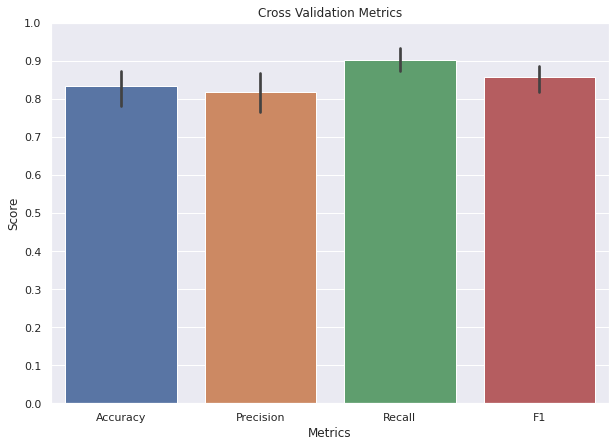

In [112]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.barplot(data=cv_metrics)
plt.title('Cross Validation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.yticks(np.arange(0,1.1,0.1))
plt.savefig('./images/cross_validation_metrics.png')

### Feature Importance

In [113]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [115]:
# For Logistic Regression we use coef_ tu get the coefficient of the features
clf.coef_

array([[ 0.01638706, -0.56559158,  0.55683033, -0.01628601, -0.0040538 ,
        -0.04132983,  0.27309904,  0.02594585, -0.3389333 , -0.40193465,
         0.27674822, -0.49542519, -0.55979687]])

In [118]:
features_coef = dict(zip(df.columns, list(clf.coef_[0])))
features_coef

{'age': 0.016387063930567217,
 'sex': -0.5655915810395411,
 'cp': 0.556830327164439,
 'trestbps': -0.016286014007382246,
 'chol': -0.004053798148250331,
 'fbs': -0.04132982560744917,
 'restecg': 0.27309904460851897,
 'thalach': 0.02594585273849355,
 'exang': -0.33893330306253844,
 'oldpeak': -0.40193465320787747,
 'slope': 0.27674821899188606,
 'ca': -0.4954251868527103,
 'thal': -0.559796870542111}

In [120]:
features_coef_df = pd.DataFrame(features_coef, index=[0])

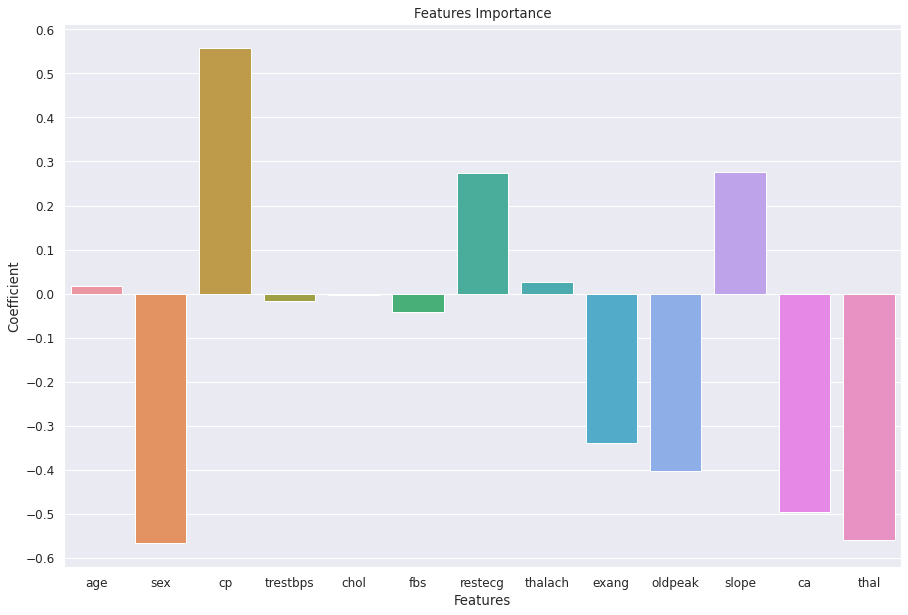

In [129]:
# Create a plot to visualize
sns.set(font_scale=1.1)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=features_coef_df)
plt.title('Features Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.yticks(np.arange(-0.6,0.7,0.1))
plt.savefig('./images/features_importance.png')

As we can see, Chest Pain feature its the most important variable in this dataset to diagnostic if a patient has or not a heart disease.

## Conclusion:
* Because this dataset its limited (about 300 samples), we could not reach our goal to obtain at least 90% accuracy, but we absolutly find out some interesting things about this reserach and trained a model to predict with 86% of accuracy if a patient has or no Heart Disease.
* The plots that we created could be use as a reference in future researches about this topic, maybe try a different model to improve the accuracy.
### Notes:
* Chest pain its the most importance variable to predict if a patient has heart disease or not, at least with this dataset and in the same environtment.
* The best estimiator is Logistic Regression tunned with the parameters defined with the GridSearchCV.